In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf

In [50]:
org_data = yf.download(tickers = '^RUI', start = '2014-03-11',end = '2024-07-10')
org_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI,^RUI
Date,,,,,,
2014-03-11 00:00:00+00:00,1044.680054,1044.680054,1053.300049,1042.550049,1050.920044,0
2014-03-12 00:00:00+00:00,1045.270020,1045.270020,1045.280029,1037.119995,1042.479980,0
2014-03-13 00:00:00+00:00,1032.939941,1032.939941,1048.660034,1030.319946,1046.630005,0
2014-03-14 00:00:00+00:00,1030.800049,1030.800049,1036.599976,1029.910034,1031.880005,0
2014-03-17 00:00:00+00:00,1040.219971,1040.219971,1042.510010,1033.989990,1033.989990,0
2014-03-18 00:00:00+00:00,1048.030029,1048.030029,1048.839966,1041.079956,1041.079956,0
2014-03-19 00:00:00+00:00,1041.530029,1041.530029,1049.060059,1035.750000,1047.680054,0
2014-03-20 00:00:00+00:00,1047.219971,1047.219971,1048.069946,1037.739990,1040.459961,0


In [51]:
data = pd.DataFrame(index=org_data.index)
data['Adj Close'] = org_data['Adj Close']['^RUI']
data['Open'] = org_data['Open']['^RUI']
data['Close'] = org_data['Close']['^RUI']
data['High'] = org_data['High']['^RUI']
data['Low'] = org_data['Low']['^RUI']
# data['Volume'] = org_data['Volume']['^RUI']

In [52]:
data.columns

Index(['Adj Close', 'Open', 'Close', 'High', 'Low'], dtype='object')

In [53]:
data.index.names

FrozenList(['Date'])

In [54]:
# Adding indicators
data['RSI']=ta.rsi(data['Close'], length=15)
data['EMAF']=ta.ema(data['Close'], length=20)
data['EMAM']=ta.ema(data['Close'], length=100)
data['EMAS']=ta.ema(data['Close'], length=150)

data['NextCandleMovement'] = data['Adj Close']-data.Open
data['NextCandleMovement'] = data['NextCandleMovement'].shift(-1)

# data['TargetClass'] = [1 if data.NextCandleMovement[i]>0 else 0 for i in range(len(data))]
# 
# data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True, drop=True)
# data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.drop(['Close'], axis=1, inplace=True)

In [55]:
data

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039
...,...,...,...,...,...,...,...,...,...
2444,2980.850098,2981.949951,2984.949951,2966.399902,66.257906,2952.935312,2832.424685,2767.694222,24.070068
2445,2998.479980,2974.409912,2998.820068,2972.939941,70.083997,2957.272899,2835.712908,2770.750987,4.000000
2446,3013.159912,3009.159912,3014.360107,2998.340088,72.832354,2962.595472,2839.226711,2773.961702,14.380127
2447,3027.860107,3013.479980,3029.439941,3009.899902,75.269925,2968.811151,2842.962025,2777.324594,-0.560059


In [56]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039
5,1049.040039,1040.250000,1055.520020,1040.250000,37.526365,1071.360681,1082.168632,1074.362667,10.339966
6,1058.819946,1048.479980,1059.290039,1046.829956,42.235981,1070.166325,1081.706282,1074.156803,17.209961
7,1080.250000,1063.040039,1080.910034,1063.040039,50.922110,1071.126675,1081.677445,1074.237507,-9.339966
8,1071.780029,1081.119995,1084.660034,1071.670044,47.873605,1071.188899,1081.481456,1074.204958,8.849976
9,1085.130005,1076.280029,1091.369995,1076.280029,52.659620,1072.516624,1081.553705,1074.349661,6.500000


In [57]:
#NextCandleMovement column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [68]:
data_set

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039
...,...,...,...,...,...,...,...,...,...
2444,2980.850098,2981.949951,2984.949951,2966.399902,66.257906,2952.935312,2832.424685,2767.694222,24.070068
2445,2998.479980,2974.409912,2998.820068,2972.939941,70.083997,2957.272899,2835.712908,2770.750987,4.000000
2446,3013.159912,3009.159912,3014.360107,2998.340088,72.832354,2962.595472,2839.226711,2773.961702,14.380127
2447,3027.860107,3013.479980,3029.439941,3009.899902,75.269925,2968.811151,2842.962025,2777.324594,-0.560059


In [70]:
data_set.describe()

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1774.920497,1774.322944,1784.566080,1763.747764,55.393710,1767.629028,1739.356820,1723.092960,0.601041
std,532.821999,532.490738,535.588884,529.501729,11.069753,527.489152,510.311454,501.974291,18.312531
min,1005.890015,1006.770020,1016.210022,995.549988,17.956774,1043.202370,1081.481456,1074.156803,-173.589966
25%,1306.510010,1306.219971,1311.989990,1298.719971,47.479802,1306.109866,1265.456036,1245.580548,-6.000000
50%,1615.040039,1613.520020,1622.140015,1605.729980,56.745556,1608.465264,1603.295831,1589.541118,0.899902
75%,2260.149902,2258.149902,2271.290039,2242.239990,63.760568,2242.276919,2232.887631,2217.607859,8.869873
max,3030.889893,3031.449951,3036.229980,3025.479980,84.886393,2974.723412,2846.683369,2780.683075,105.410034


In [69]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
data_set_scaled = sc.fit_transform(data_set)
data_set_scaled

array([[-0.94943214, -0.93743212, -0.94163423, ..., -0.99421922,
        -0.99699632,  0.11978467],
       [-0.96692346, -0.95061937, -0.95594109, ..., -0.99527827,
        -0.99757593,  0.23763458],
       [-0.96454318, -0.96447837, -0.96307959, ..., -0.99626229,
        -0.99811046,  0.23154069],
       ...,
       [ 0.98248891,  0.97798167,  0.97834687, ...,  0.99155149,
         0.99212274,  0.34745586],
       [ 0.99700762,  0.98224908,  0.99327726, ...,  0.99578366,
         0.99606396,  0.24035776],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.21225796]])

In [74]:
data_set_scaled[:,4]

array([-0.50667341, -0.63757793, -0.5995652 , ...,  0.63979956,
        0.71263939,  0.72699672])

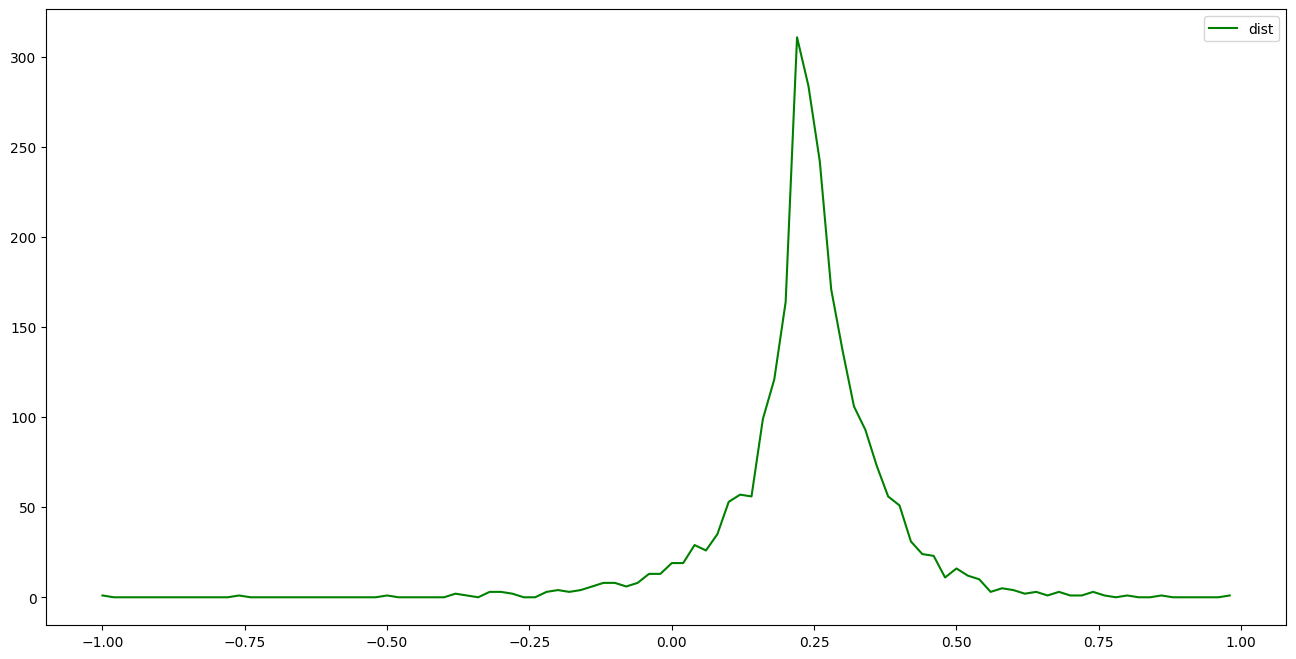

In [87]:
h = np.histogram(data_set_scaled[:,8], bins=100)
plt.figure(figsize=(16,8))
plt.plot(h[1][:len(h[0])],h[0] , color = 'green', label = 'dist')
plt.legend()
plt.show()

In [59]:
data_set_scaled.shape

(2449, 9)

In [60]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(6):#data_set_scaled[0].size):#2 columns are target not X
# for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
# for j in range(4):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[0.02528393 0.03128394 0.02918289 0.03029171 0.24666329 0.02497561]
  [0.01653827 0.02469032 0.02202946 0.02141948 0.18121103 0.02240851]
  [0.01772841 0.01776081 0.0184602  0.02111405 0.2002174  0.02020473]
  ...
  [0.06625187 0.06301241 0.06249935 0.06832749 0.77040582 0.03897334]
  [0.06527404 0.06534857 0.06133105 0.06792356 0.74256269 0.03993926]
  [0.0665827  0.06352609 0.0619301  0.06795308 0.76045004 0.04094385]]

 [[0.01653827 0.02469032 0.02202946 0.02141948 0.18121103 0.02240851]
  [0.01772841 0.01776081 0.0184602  0.02111405 0.2002174  0.02020473]
  [0.0141185  0.0145702  0.01096522 0.00751257 0.17406093 0.01785039]
  ...
  [0.06527404 0.06534857 0.06133105 0.06792356 0.74256269 0.03993926]
  [0.0665827  0.06352609 0.0619301  0.06795308 0.76045004 0.04094385]
  [0.0694864  0.06816387 0.06680628 0.07272668 0.79808827 0.04214269]]

 [[0.01772841 0.01776081 0.0184602  0.02111405 0.2002174  0.02020473]
  [0.0141185  0.0145702  0.01096522 0.00751257 0.17406093 0.01785039]

In [61]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [62]:
X

array([[[0.02528393, 0.03128394, 0.02918289, 0.03029171, 0.24666329,
         0.02497561],
        [0.01653827, 0.02469032, 0.02202946, 0.02141948, 0.18121103,
         0.02240851],
        [0.01772841, 0.01776081, 0.0184602 , 0.02111405, 0.2002174 ,
         0.02020473],
        ...,
        [0.06625187, 0.06301241, 0.06249935, 0.06832749, 0.77040582,
         0.03897334],
        [0.06527404, 0.06534857, 0.06133105, 0.06792356, 0.74256269,
         0.03993926],
        [0.0665827 , 0.06352609, 0.0619301 , 0.06795308, 0.76045004,
         0.04094385]],

       [[0.01653827, 0.02469032, 0.02202946, 0.02141948, 0.18121103,
         0.02240851],
        [0.01772841, 0.01776081, 0.0184602 , 0.02111405, 0.2002174 ,
         0.02020473],
        [0.0141185 , 0.0145702 , 0.01096522, 0.00751257, 0.17406093,
         0.01785039],
        ...,
        [0.06527404, 0.06534857, 0.06133105, 0.06792356, 0.74256269,
         0.03993926],
        [0.0665827 , 0.06352609, 0.0619301 , 0.06795308, 0.760

In [63]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 6)
(484, 30, 6)
(1935, 1)
(484, 1)
[[0.62989244]
 [0.61336919]
 [0.63150517]
 ...
 [0.64992816]
 [0.61014374]
 [0.71143322]]


In [64]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Activation
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 6), name='lstm_input')
# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 6s 29ms/step - loss: 0.0172 - val_loss: 0.0132
Epoch 2/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0039 - val_loss: 0.0132
Epoch 3/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0038 - val_loss: 0.0125
Epoch 4/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0037 - val_loss: 0.0143
Epoch 5/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0038 - val_loss: 0.0138
Epoch 6/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0037 - val_loss: 0.0127
Epoch 7/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0035 - val_loss: 0.0130
Epoch 8/30
117/117 [==============================] - 3s 25ms/step - loss: 0.0036 - val_loss: 0.0127
Epoch 9/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0034 - val_loss: 0.0129
Epoch 10/30
117/117 [==============================] - 3s 24ms/step - loss: 0.0038 - val_lo

In [65]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 16ms/step
[0.62911993] [0.61548333]
[0.628799] [0.70100343]
[0.62888694] [0.60100378]
[0.6291878] [0.58534027]
[0.6287557] [0.73071683]
[0.6293697] [0.58007156]
[0.6285455] [0.7532609]
[0.6284739] [0.67189906]
[0.6283744] [0.65014342]
[0.6280252] [0.58000068]


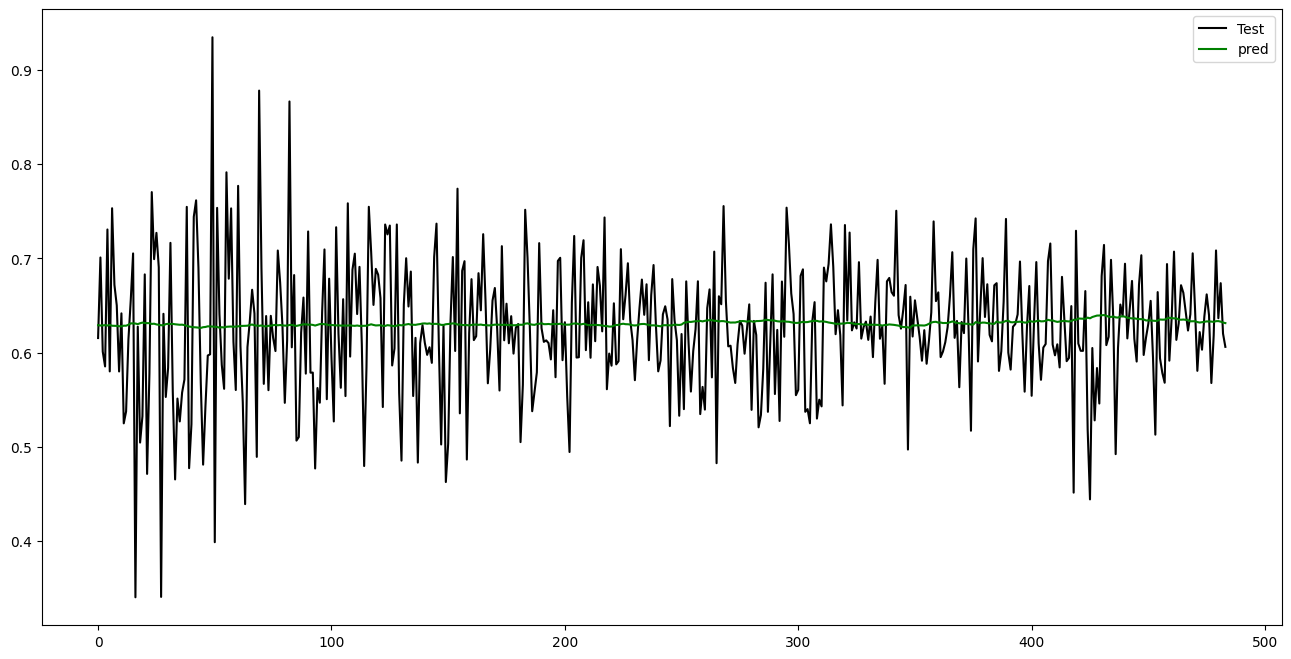

In [66]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()